## Midterms Analysis of the Churn / Working together with the Customer

In [213]:
# Importing the different libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [214]:
# Importing the dataset
data = pd.read_csv('./datasets/telecom_churn.csv')
# dataframe.head() # Checking if the data is loaded correctly
dataframe = pd.DataFrame(data)

C:\Users\sycro\AppData\Local\Temp\ipykernel_5792\3278962511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()


C:\Users\sycro\AppData\Local\Temp\ipykernel_5792\3278962511.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()['Churn']


Account length            0.016541
Area code                 0.006174
Number vmail messages    -0.089728
Total day minutes         0.205151
Total day calls           0.018459
Total day charge          0.205151
Total eve minutes         0.092796
Total eve calls           0.009233
Total eve charge          0.092786
Total night minutes       0.035493
Total night calls         0.006141
Total night charge        0.035496
Total intl minutes        0.068239
Total intl calls         -0.052844
Total intl charge         0.068259
Customer service calls    0.208750
Churn                     1.000000
Name: Churn, dtype: float64


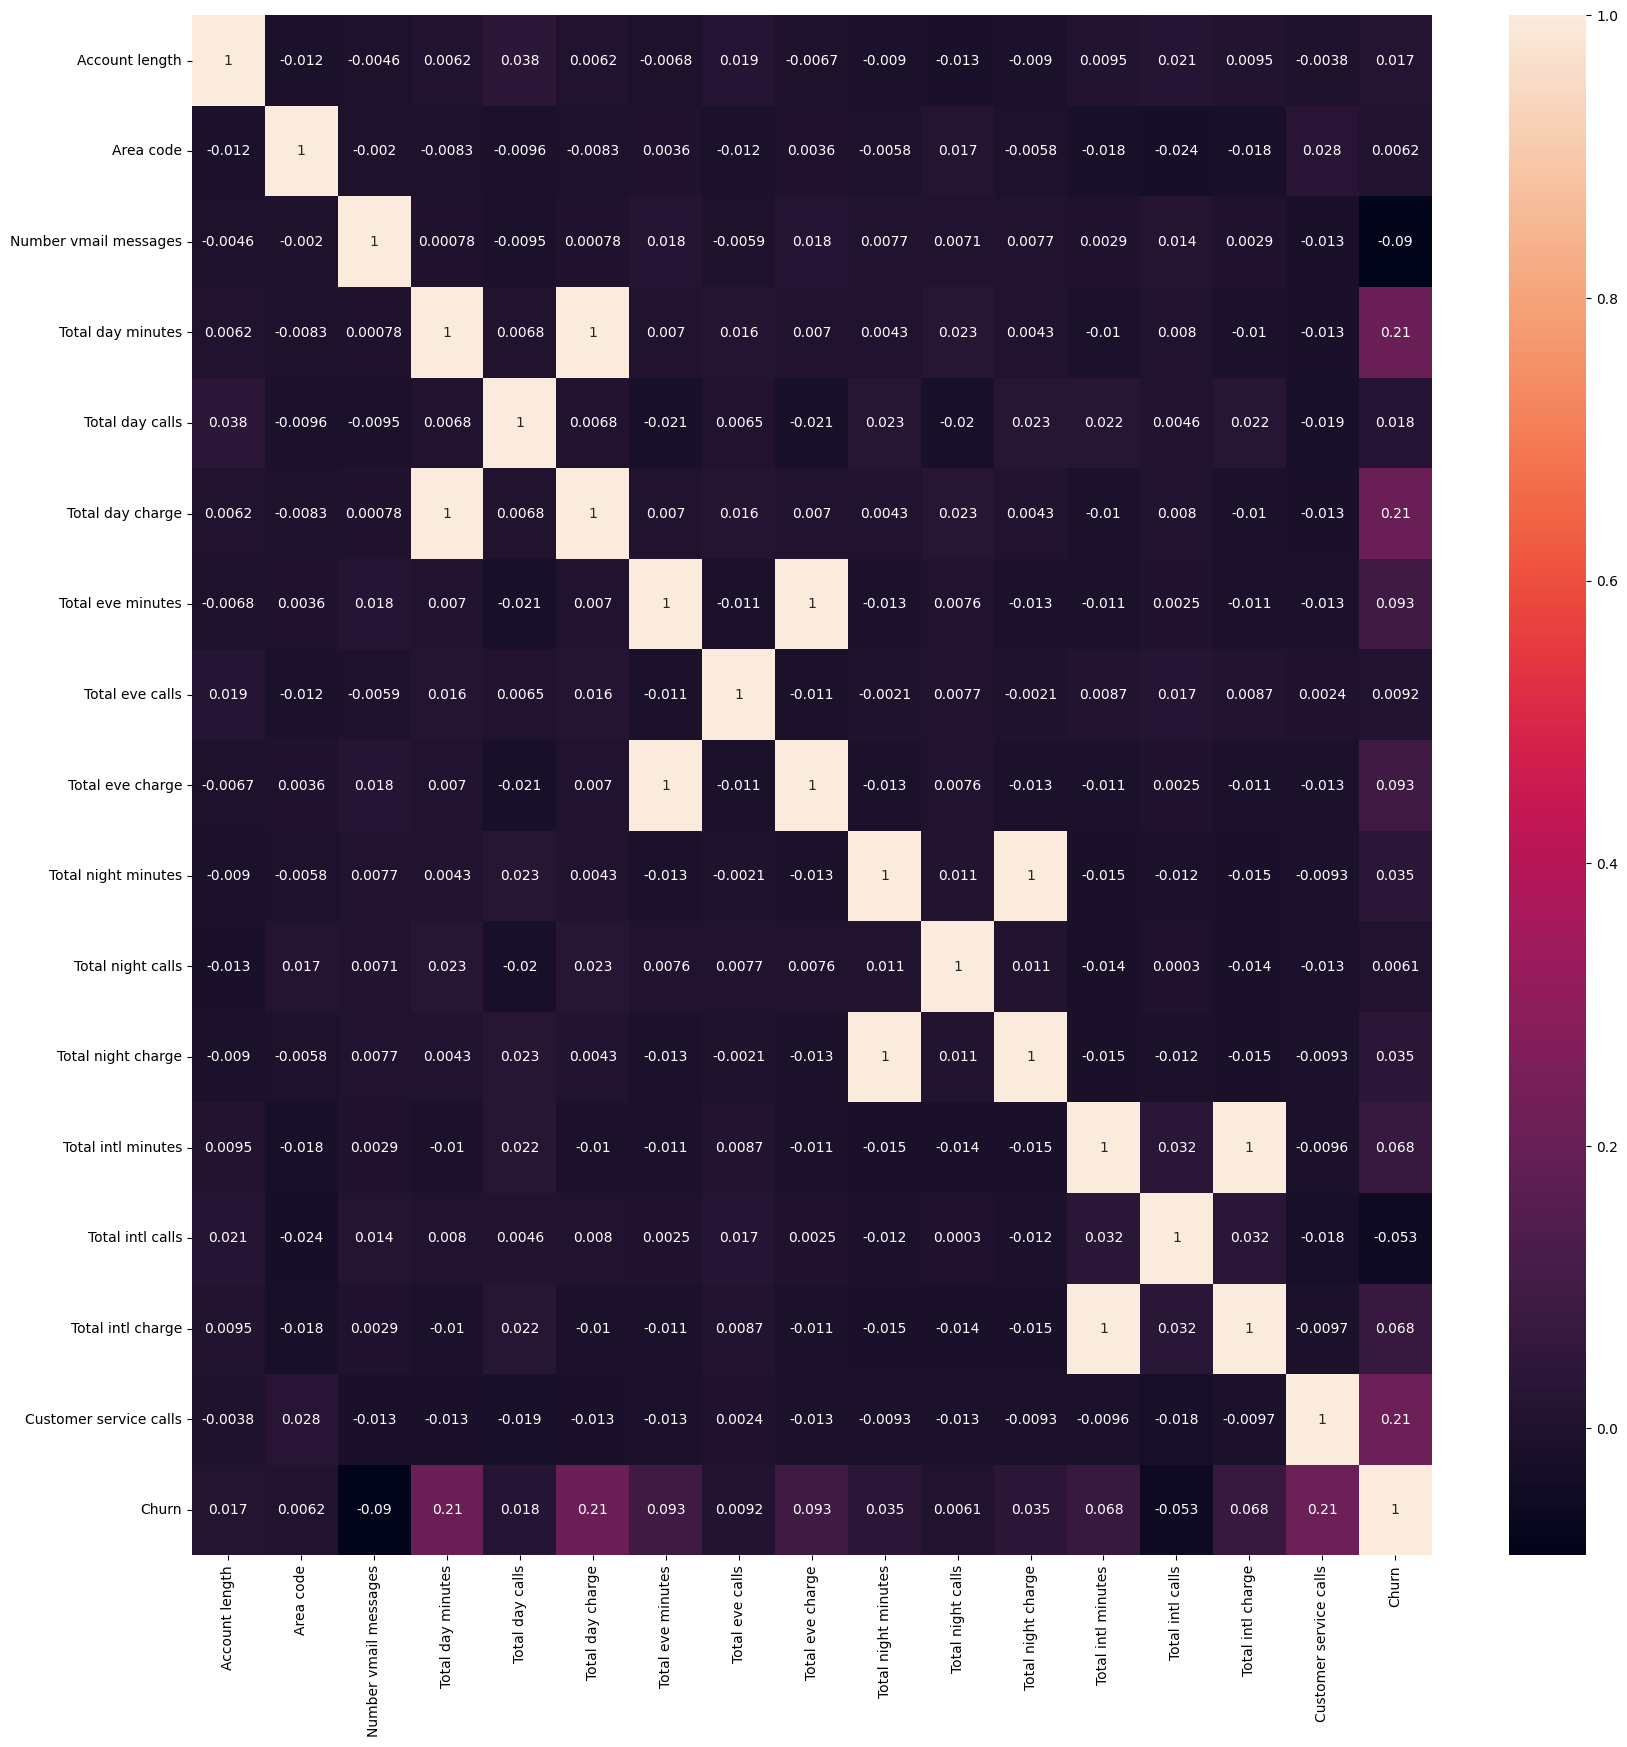

In [215]:
# Checking the correlation of the dataset
correlation = dataframe.corr()

# Plotting the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

# Conclusion after looking at the correlation of the values
# There is a high correlation between the total day minutes and the total day charge
# There is a high correlation between the total eve minutes and the total eve charge
# There is a high correlation between the total night minutes and the total night charge
# There is a high correlation between the total intl minutes and the total intl charge

# However, I cannot find any correlation between the churn and the other values to determine as to whether or not they should be denied service
# I will need to further investigate the data to determine if there is a correlation between the churn and the other values

# Checking the correlation of the churn with the other values
correlation = dataframe.corr()['Churn']
print(correlation)

# Conclusion after looking at the correlation of the values
# There is a high correlation between the churn and the total day minutes but it is still under the treshold values to be considered as a high correlation

# However, I will try to implement a machine learning model to determine if there is a correlation between the churn and the other values that could determine as to whether or not the customer should be denied service


# I decided to just use the total day minutes and the eve minutes to determine if the customer should be denied service

# Columns to be used
#   - Total day minutes
#   - Total eve minutes

# This is for the perceptron model

In [216]:
# Checking the dataset for any values of null or any type
dataframe.info()

# It appears that there are some objects that are not numerical which will show some issues when we are fitting the model
# We need to convert the objects to numerical values which will be shown below

# The area code and the state seems to imply the same set of the data, using this conclusion it seems safe to drop the related state in favor of the area code.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [217]:
dataframe.isnull().sum().to_frame("Null Values")

,Null Values
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [218]:
# Since no null values is present, we can proceed to the next step

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Replacing the values for yes and no to 1 and 0 respectively
dataframe.replace({True: 1, False: 0}, inplace=True)

# Replacing the values for yes and no to 1 and 0 respectively
dataframe.replace({'Yes': 1, 'No': 0}, inplace=True)

# Dropping the not needed columns
dataframe.drop(['State'], axis=1, inplace=True)

dataframe.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [219]:
# Checking the relativity of the values after the replacement

# sns.heatmap(dataframe.corr(), annot=True, fmt=".2f")

# It appears that the values are not related to each other, so we can proceed to the next step

In [220]:


# Dropping the values to be used for the label in the model
X_features = dataframe.drop('Churn', axis=1)
y_labels = dataframe['Churn']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)


In [221]:
# Creating the precision and recall and f1 score of the models
from sklearn.metrics import precision_score, recall_score, f1_score


In [222]:
# Setting up the Naive Bayes model
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

# Predicting the values for the test set
y_pred = naive_bayes_model.predict(X_test)

# Checking the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
print(accuracy_naive_bayes)

# # Creating a sample prediction for the values
# for val in X_test.values:
#     val = val.reshape(1, -1) # Reshaping the values in order to fit the model
#     sample_prediction = naive_bayes_model.predict(val)
#     print(f"Our prediction is {sample_prediction}")
#     # print(val)




0.849


                  True Postive  False Positive
Predict Positive           783              74
Predict Negative            77              66


<AxesSubplot: >

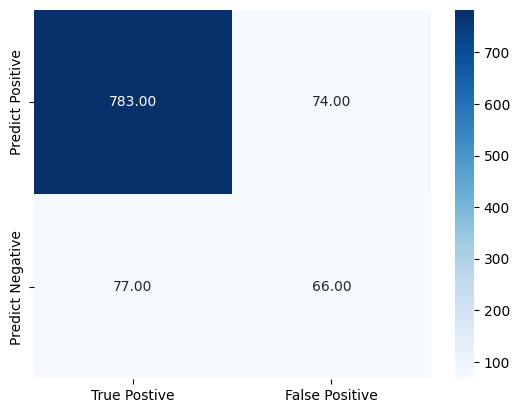

In [223]:
# Naive Bayes Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix_naive_bayes = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['True Postive', 'False Positive'], index=['Predict Positive', 'Predict Negative'])
print(confusion_matrix_naive_bayes)
sns.heatmap(confusion_matrix_naive_bayes, annot=True, fmt=".2f", cmap='Blues')

In [224]:
naive_bayes_precision = precision_score(y_test, y_pred)
naive_bayes_recall = recall_score(y_test, y_pred)
naive_bayes_f1 = f1_score(y_test, y_pred)

print("The Naive Bayes Precision is: ", naive_bayes_precision)
print("The Naive Bayes Recall is: ", naive_bayes_recall)
print("The Naive Bayes F1 Score is: ", naive_bayes_f1)



The Naive Bayes Precision is:  0.4714285714285714
The Naive Bayes Recall is:  0.46153846153846156
The Naive Bayes F1 Score is:  0.4664310954063604


## Creating a Perceptron for the Model

In [225]:
# Importing the needed libraries for the model to create a perceptron model
from sklearn.linear_model import Perceptron

# Setting up the perceptron model
perceptron_model = Perceptron()

# Fitting the model with the training data
perceptron_model.fit(X_train, y_train)

# Predicting the values for the test set
y_pred = perceptron_model.predict(X_test)

# print(y_pred)

# Checking the accuracy of the model
accuracy_perceptron = accuracy_score(y_test, y_pred)
print(accuracy_perceptron)


0.885


In [226]:
# Creating the precision and recall and f1 score of the model
from sklearn.metrics import precision_score, recall_score, f1_score

perceptron_precision = precision_score(y_test, y_pred)
perceptron_recall = recall_score(y_test, y_pred)
perceptron_f1 = f1_score(y_test, y_pred)

print(f"Perceptron Precision: {perceptron_precision} \nPerceptron Recall: {perceptron_recall} \nPerceptron F1 Score: {perceptron_f1}")

Perceptron Precision: 0.7692307692307693 
Perceptron Recall: 0.27972027972027974 
Perceptron F1 Score: 0.4102564102564103


In [227]:
# Comparison of the two types of model for this dataset
# accuracy_perceptron = accuracy_score(y_test, y_pred)

print(f"Accuracy of Naive Bayes: {accuracy_naive_bayes} \nAccuracy of the Perceptron Model {accuracy_perceptron}")

Accuracy of Naive Bayes: 0.849 
Accuracy of the Perceptron Model 0.885


[[845  12]
 [103  40]]


<AxesSubplot: >

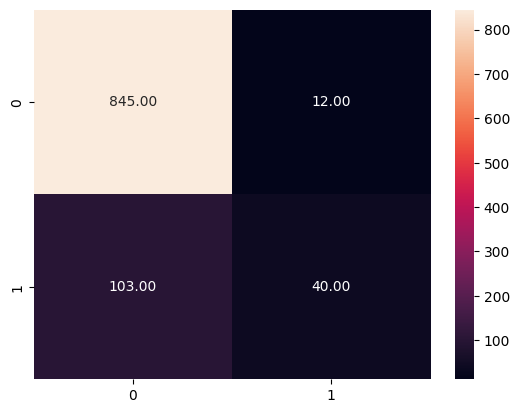

In [228]:
# Creating a confustion matrix for the model
from sklearn.metrics import confusion_matrix

cm_perceptron = confusion_matrix(y_test, y_pred)

# Creating a dataframe for the confusion matrix
confusion_matrix_naive_bayes = pd.DataFrame(cm_perceptron, columns=['True Postive', 'False Positive'], index=['Predict Positive', 'Predict Negative'])

print(cm_perceptron)

# Creating a graph for the confusion matrix using the seaborn library
sns.heatmap(cm_perceptron, annot=True, fmt=".2f")



In [229]:

# For the inputs of the values we can see that the model is predicting the values correctly for modification
Account_length = 510
Area_code = 0
International_plan = 0
Voice_mail_plan = 0
Number_vmail_messages = 0
Total_day_minutes = 155
Total_day_calls = 93
Total_day_charge = 26.35
Total_eve_minutes = 330.6
Total_eve_calls = 106
Total_eve_charge = 28.1
Total_night_minutes = 189.4
Total_night_calls = 123
Total_night_charge = 8.52
Total_intl_minutes = 13.5
Total_intl_calls = 3
Total_intl_charge = 3.65
Customer_service_calls = 1

values_array = [
    Account_length,
    Area_code,
    International_plan,
    Voice_mail_plan,
    Number_vmail_messages,
    Total_day_minutes,
    Total_day_calls,
    Total_day_charge,
    Total_eve_minutes,
    Total_eve_calls,
    Total_eve_charge,
    Total_night_minutes,
    Total_night_calls,
    Total_night_charge,
    Total_intl_minutes,
    Total_intl_calls,
    Total_intl_charge,
    Customer_service_calls,
]

values_array = np.array(values_array)
values_array = values_array.reshape(1, -1)
custom_data_prediction = naive_bayes_model.predict(values_array)
print(f"Our prediction is {custom_data_prediction}")


Our prediction is [0]


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [230]:
import numpy as np

# Creating a perceptron model from scratch using the sigmoid function
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [231]:
# perceptron = Perceptron(eta=0.1, n_iter=100, random_state=42)

# # Using a custom function that can discard the values of the header and the first column
# X, y = Perceptron.load_csv('./datasets/telecom_churn.csv')

# # Fitting the model with the values
# perceptron.fit(X, y)

# # Creating a graph for the errors of the model
# plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Number of updates')
# plt.show()

# # Creating a prediction for the values
# for val in X:
#     val = np.array(val)
#     val = val.reshape(1, -1)
#     prediction = perceptron.predict(val)
#     print(f"Our prediction is {prediction}")


In [232]:
count = 0
for cat in dataframe.columns:
    count += 1
    print(count, cat)
    

1 Account length
2 Area code
3 International plan
4 Voice mail plan
5 Number vmail messages
6 Total day minutes
7 Total day calls
8 Total day charge
9 Total eve minutes
10 Total eve calls
11 Total eve charge
12 Total night minutes
13 Total night calls
14 Total night charge
15 Total intl minutes
16 Total intl calls
17 Total intl charge
18 Customer service calls
19 Churn


In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = dataframe.iloc[1:3334, 18].values
y = np.where(y == 1, 1, -1)

# Specifiying the Columns to Based the Conclusion on
# Which could either be positive or negative in our case the True or False

# corr_column_1

true_columns = dataframe[dataframe['Churn'] == 1]
false_columns = dataframe[dataframe['Churn'] == 0]

# Using the earlier correlation matrix which I have decided to use for the model which are:


# print(true_columns)
# print(false_columns)

# Columns to be used
#   - Total day minutes
#   - Total eve minutes

total_day_minutes = dataframe.iloc[1:3334, 5].values
total_eve_minutes = dataframe.iloc[1:3334, 8].values

# Strong correlation between flipper length and body mass
X = dataframe.iloc[1:3334, [5, 8]].values # Due to strong correlation, decided to change the values

# plot data
plt.scatter(true_columns, false_columns, color='red', marker='o', label='true')
            # color='red', marker='o', label='true')
plt.scatter(X[154:221, 0], X[154:221, 1],
            color='blue', marker='x', label='false')


plt.xlabel('TRUE')
plt.ylabel('FALSE')
# plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show() 

IndexError: positional indexers are out-of-bounds

In [ ]:
ppn = Perceptron(eta=0.01, n_iter=100) 

# eta = learning rate of the perceptron model
# n_iter = number of epochs / iteration for the training of the model

ppn.fit(X_train, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()